In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import seaborn as sns

## Вспоминаем прошлый семинар

Считаем данные о станциях московского метрополитена в 2014 году:

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving metro_2014_pairwise.csv to metro_2014_pairwise (2).csv
User uploaded file "metro_2014_pairwise.csv" with length 51826 bytes


In [ ]:
metro_data =pd.read_csv('metro_2014_pairwise.csv') #YOUR CODE

Формат такой: две станции записаны в одной строке, если между ними есть перегон.

Загрузим данные в граф из подготовленной таблицы:



In [ ]:
metro_graph =nx.from_pandas_edgelist(metro_data, source='Start station', target='End station') #YOUR CODE

# Указываем, что направление перегона между станциями нас не интересует.
# (как правило, можем поехать в обе стороны)
metro_graph = nx.to_undirected(metro_graph)

print(nx.info(metro_graph))

Graph with 194 nodes and 229 edges


### Метрики на графе

Вычислим плотность сети:

In [ ]:
nx.density(metro_graph)

0.012232252550611613

Вычислим коэффициент кластеризации для графа:

In [ ]:
nx.transitivity(metro_graph)

0.064

Вычислим центральности:

In [ ]:
degree = nx.degree_centrality(metro_graph)
betweenness = nx.betweenness_centrality(metro_graph)
closeness = nx.closeness_centrality(metro_graph)

In [ ]:
graph_measures = {
    'degree': degree,
    'betweenness': betweenness,
    'closeness': closeness,
}

pd.DataFrame(graph_measures)

,degree,betweenness,closeness
Сокольническая_Черкизовская,0.005181,0.000000,0.080417
Сокольническая_Преображенская_площадь,0.010363,0.010363,0.087409
Сокольническая_Сокольники,0.010363,0.020617,0.095639
Сокольническая_Красносельская,0.010363,0.030764,0.105464
Сокольническая_Комсомольская,0.015544,0.043644,0.117397
...,...,...,...
Арбатско-Покровская_Митино,0.010363,0.010363,0.061485
Арбатско-Покровская_Пятницкое_шоссе,0.005181,0.000000,0.057941
Люблинская_Марьина_Роща,0.005181,0.000000,0.100416
Люблинская_Шипиловская,0.010363,0.010342,0.066369


Посмотрим, какие станции обладают максимальными показателями и проинтерпретируем:

In [ ]:
pd.DataFrame(graph_measures).sort_values(by='betweenness', ascending=False)

,degree,betweenness,closeness
Кольцевая_Киевская,0.020725,0.182014,0.133195
Арбатско-Покровская_Киевская,0.020725,0.142770,0.126226
Кольцевая_Парк_культуры,0.015544,0.142050,0.133564
Серпуховско-Тимирязевская_Серпуховская,0.015544,0.136287,0.130142
Кольцевая_Октябрьская,0.015544,0.129519,0.136782
...,...,...,...
Арбатско-Покровская_Щёлковская,0.005181,0.000000,0.070644
Замоскворецкая_Алма-Атинская,0.005181,0.000000,0.067037
Замоскворецкая_Речной_вокзал,0.005181,0.000000,0.071008
Сокольническая_Юго-Западная,0.005181,0.000000,0.071827


## Реальные данные

Подгрузка данных из файла-не таблицы осуществляется достаточно просто, если данные записаны в правильном формате. 

Примеры наиболее популярных форматов для чтения и сохранения графов (больше можно найти в документации NetworkX):
- список смежных вершин (`nx.read_adjlist`, `nx.write_adjlist`, именно так хранятся графы в NetworkX)
- список всех рёбер (`nx.read_edgelist`, `nx.write_edgelist`)

Первые строки нашего файла `facebook_combined.txt` выглядят так:
```
214328887 34428380
17116707 28465635
380580781 18996905
221036078 153460275
107830991 17868918
151338729 222261763
```

Каждое число обозначает имя вершины (грубо говоря, id пользователя) в графе. Если в одной строке записана пара чисел, значит, пользователи с соответствующими номерами находятся друг у друга в списке друзей.

In [ ]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=5597940a771962357c485f6e45b1f059cbc96cdbfc2b5e9926c56aea611298e5
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
filename = wget.download("https://docs.google.com/document/u/0/export?format=txt&id=1unhUyPfb91bKr6SJD8uPEq9hfT3ANzp_g_MDb-cHrvI&token=AC4w5Vg6BhBpSpr-XkspHkWDGrf6NvGb8A%3A1650573783957&includes_info_params=true")

In [ ]:
#with open(filename) as file:
#    contents = file.read()
#contents

In [ ]:
facebook_users = nx.read_edgelist(filename)
facebook_users

Узнайте, сколько граф содержит вершин и связей:

In [ ]:
print('Number of nodes:',facebook_users.number_of_nodes())
print('Number of edges:', facebook_users.number_of_edges())

Number of nodes: 4040
Number of edges: 88234


Нарисуйте граф данной сети:

CPU times: user 1min 13s, sys: 419 ms, total: 1min 14s
Wall time: 1min 19s


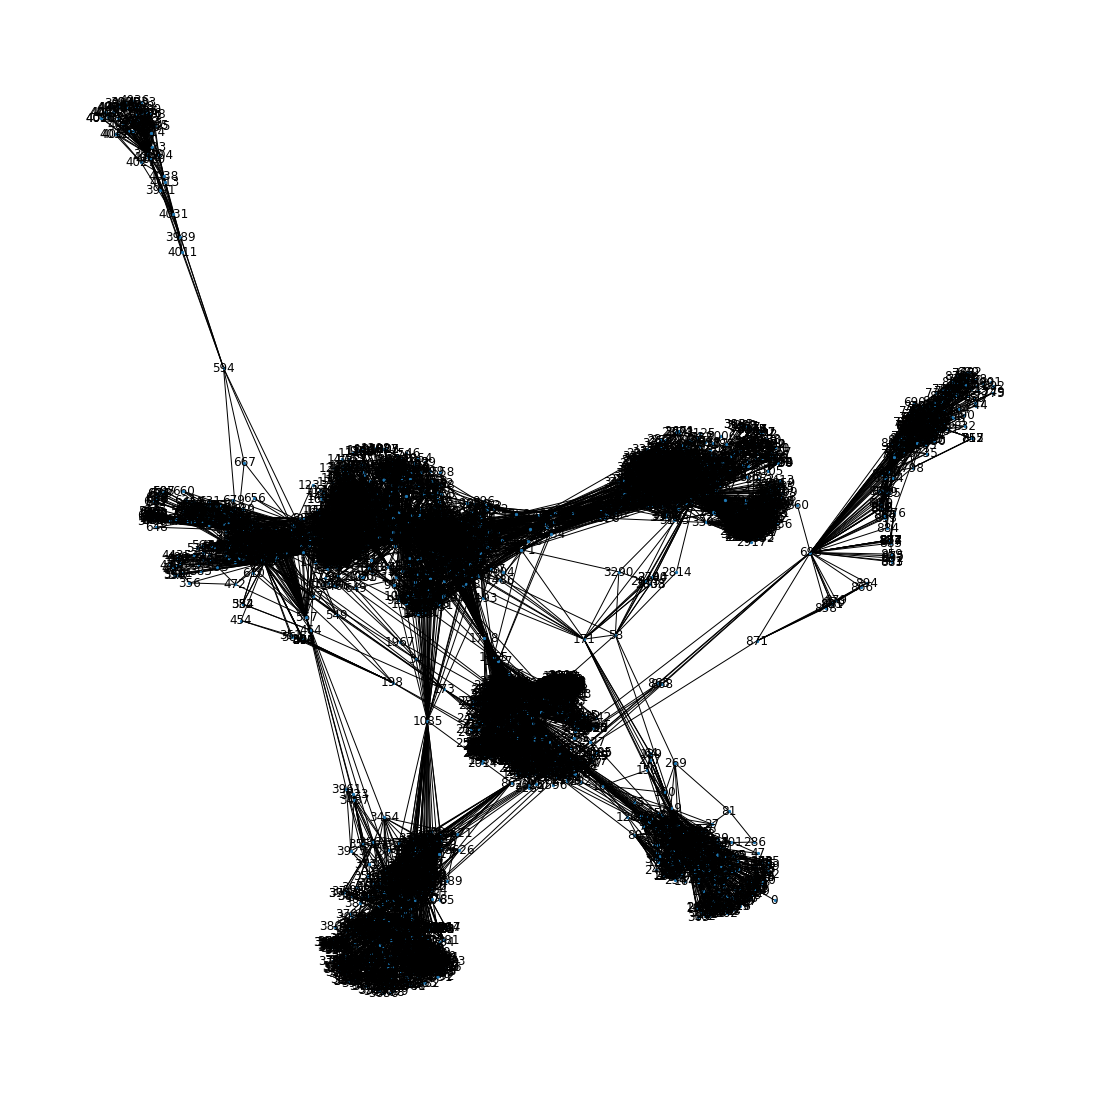

In [ ]:
%%time
plt.figure(figsize=(15, 15))
nx.draw(facebook_users, with_labels = True, node_size=5)

Нарисуем график, отражающий распределение степеней вершины:

Text(0.5, 1.0, 'Facebook users connectivity degrees')

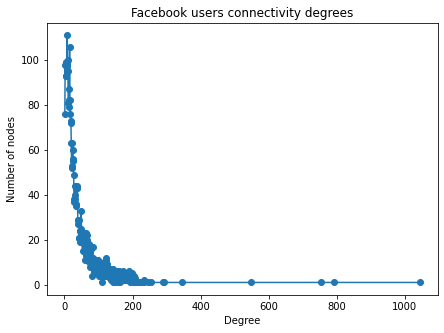

In [ ]:
degrees = dict(facebook_users.degree()) # dictionary node:degree
values = sorted(set(degrees.values()))
g_hist = [list(degrees.values()).count(x) for x in values]

plt.figure(figsize=(7, 5))
plt.plot(values, g_hist, 'o-') # degree

plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook users connectivity degrees')

Посчитайте изветные вам центральности, найдите время вычисления для каждой из них. Составьте таблицу со значениями центральностей. Отсортируйте ее по одной из центральностей.

In [ ]:
degree = nx.degree_centrality(facebook_users)
betweenness = nx.betweenness_centrality(facebook_users)
closeness = nx.closeness_centrality(facebook_users)

In [ ]:
graph_measures = {
    'degree': degree,
    'betweenness': betweenness,
    'closeness': closeness,
}

centralities_df = pd.DataFrame(graph_measures)
centralities_df

,degree,betweenness,closeness
﻿0,0.000248,0.000000e+00,0.186671
1,0.004209,4.979540e-04,0.229502
0,0.085665,1.463085e-01,0.353307
2,0.002476,7.591260e-08,0.261238
3,0.004209,1.716012e-06,0.261390
...,...,...,...
4034,0.000495,0.000000e+00,0.183959
4035,0.000248,0.000000e+00,0.183950
4036,0.000495,0.000000e+00,0.183959
4037,0.000990,7.153303e-08,0.183976


In [ ]:
centralities_df.sort_values(by='betweenness', ascending=False)

,degree,betweenness,closeness
107,0.258727,0.480443,0.459552
1684,0.196088,0.337761,0.393550
3437,0.135430,0.236042,0.314319
1912,0.186927,0.229220,0.350912
1085,0.016341,0.148999,0.357750
...,...,...,...
859,0.000495,0.000000,0.213331
858,0.001238,0.000000,0.213365
855,0.000990,0.000000,0.178259
854,0.000743,0.000000,0.178251


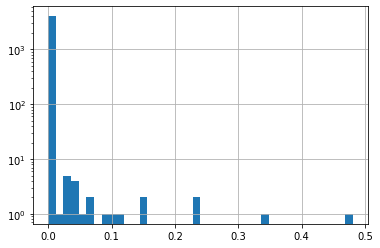

In [ ]:
centralities_df['betweenness'].hist(log=True, bins=40)

In [ ]:
nx.density(facebook_users)

0.010814607085863327

In [ ]:
nx.transitivity(facebook_users)

0.5191884097305031